# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [1]:
from datetime import datetime, timedelta

import iso3166
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# These might be helpful:
from iso3166 import countries

### Notebook Presentation

In [2]:
pd.options.display.float_format = "{:,.2f}".format

### Load the Data

In [3]:
df_data = pd.read_csv("mission_launches.csv")

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"The shape of df_data is: {df_data.shape}")
print(f"It has {df_data.shape[0]} rows and {df_data.shape[1]} columns")
print(f"Column names of df_data are: {df_data.columns}")

The shape of df_data is: (4324, 9)
It has 4324 rows and 9 columns
Column names of df_data are: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [5]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
# NA check
df_data.info()
df_data.isna().values.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


3360

In [7]:
# Duplicates, no duplicates
df_data.duplicated().values.sum()

0

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df_clean = df_data.iloc[:, 2:]

In [271]:
# Fill na as 0 for price
df_clean.fillna(0, inplace=True)

In [47]:
df_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success


In [48]:
df_clean.reset_index(inplace=True, drop=True)

In [49]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           4324 non-null   float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


## Descriptive Statistics

In [51]:
df_clean.describe()

,Price
count,"4,324.00"
mean,34.29
std,150.44
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [52]:
df_by_org = df_clean.Organisation.value_counts()

RVSN USSR shows significant advantage with total 1777 launches comparing with other organisations. Following up Arianespace with 279 total launches and CASC with 251 total launches.

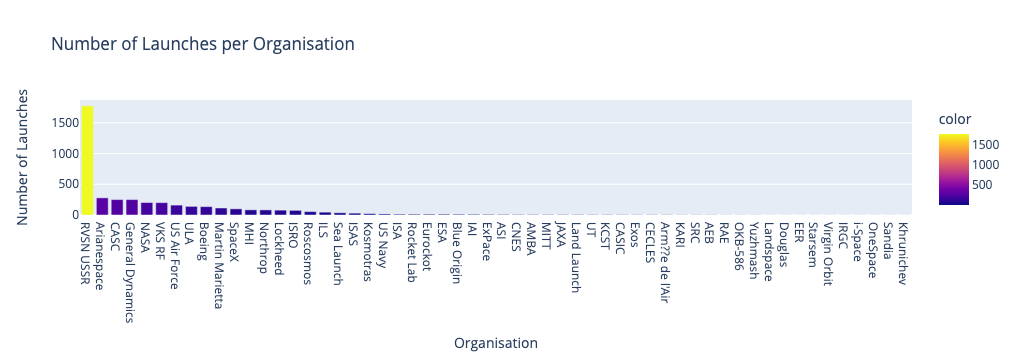

In [53]:
bar = px.bar(
    x=df_by_org.index,
    y=df_by_org.values,
    color=df_by_org.values,
    title="Number of Launches per Organisation",
    labels="Organisation",
)
bar.update_layout(xaxis_title="Organisation", yaxis_title="Number of Launches")
bar.show()

In [54]:
df_by_org_wt = df_clean[
    df_clean.Organisation != "RVSN USSR"
].Organisation.value_counts()
df_by_org_wt.head()

Arianespace         279
CASC                251
General Dynamics    251
NASA                203
VKS RF              201
Name: Organisation, dtype: int64

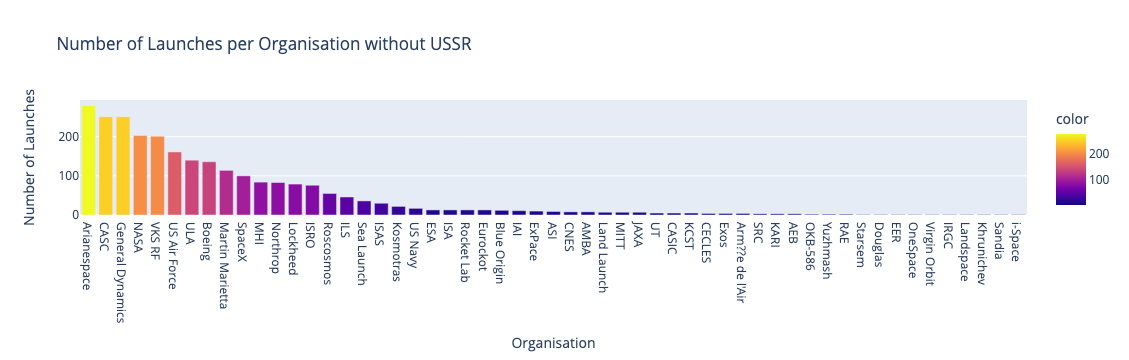

In [55]:
org_wt_bar = px.bar(
    x=df_by_org_wt.index,
    y=df_by_org_wt.values,
    color=df_by_org_wt.values,
    title="Number of Launches per Organisation without USSR",
    labels="Organisation",
)
org_wt_bar.update_layout(xaxis_title="Organisation", yaxis_title="Number of Launches")
org_wt_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [56]:
df_ar = df_clean.Rocket_Status.value_counts()
df_ar

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

3534 out of 4324 rockets are required.

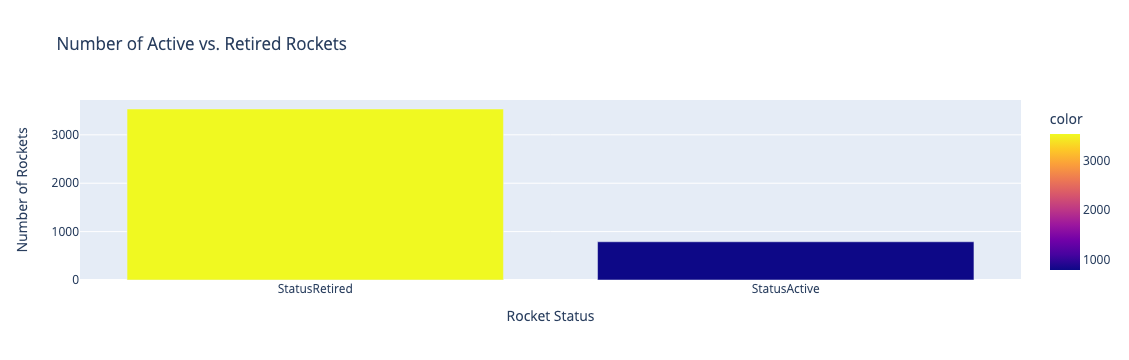

In [59]:
bar = px.bar(
    x=df_ar.index,
    y=df_ar.values,
    color=df_ar.values,
    title="Number of Active vs. Retired Rockets",
)
bar.update_layout(xaxis_title="Rocket Status", yaxis_title="Number of Rockets")
bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [33]:
df_ms = df_clean.Mission_Status.value_counts()
df_ms

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [274]:
df_ms["Success"] / df_ms.sum()

0.8970860314523589

3879 out of 4324 launches are successful, 89.7% successful rate.

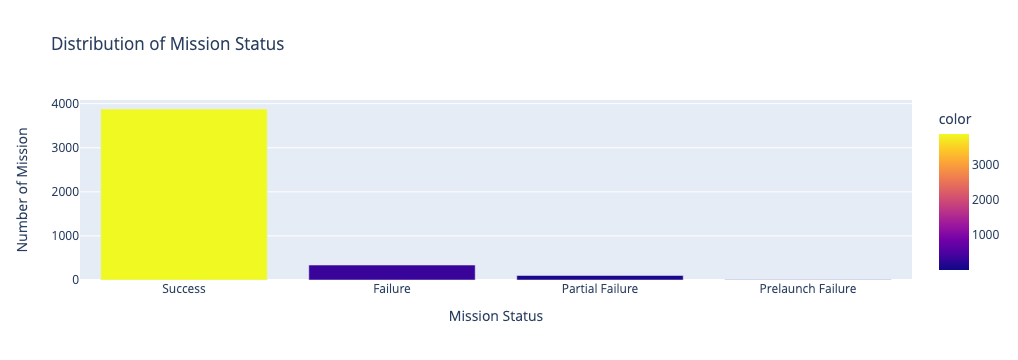

In [34]:
bar = px.bar(
    x=df_ms.index,
    y=df_ms.values,
    color=df_ms.values,
    title="Distribution of Mission Status",
)
bar.update_layout(xaxis_title="Mission Status", yaxis_title="Number of Mission")
bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           4324 non-null   float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [63]:
df_clean.describe()

,Price
count,"4,324.00"
mean,34.29
std,150.44
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,"5,000.00"


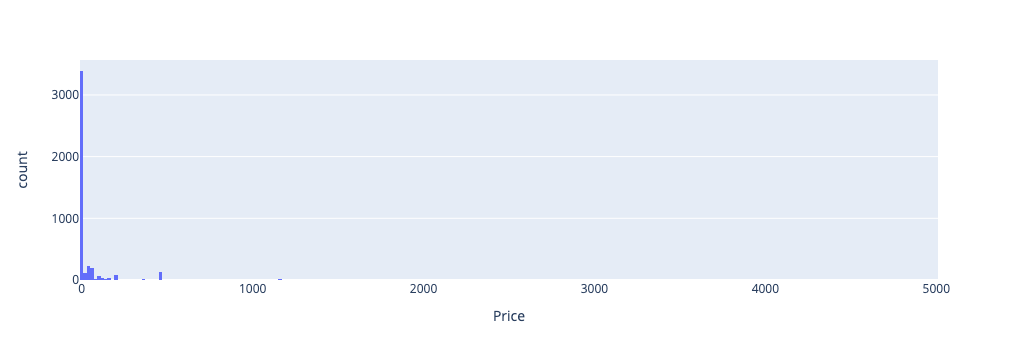

In [64]:
price_hist = px.histogram(df_clean, x="Price")
price_hist.show()

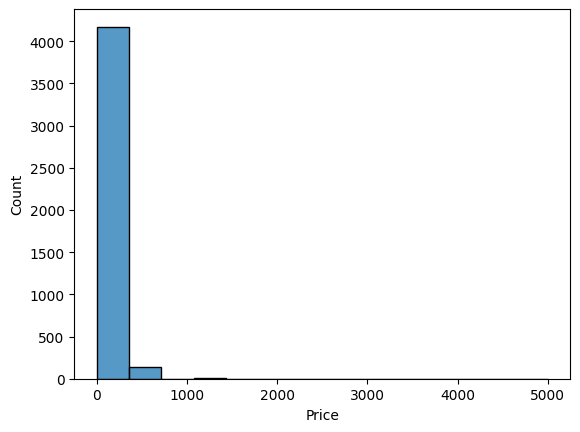

In [65]:
sns.histplot(data=df_clean, x="Price")
plt.show()

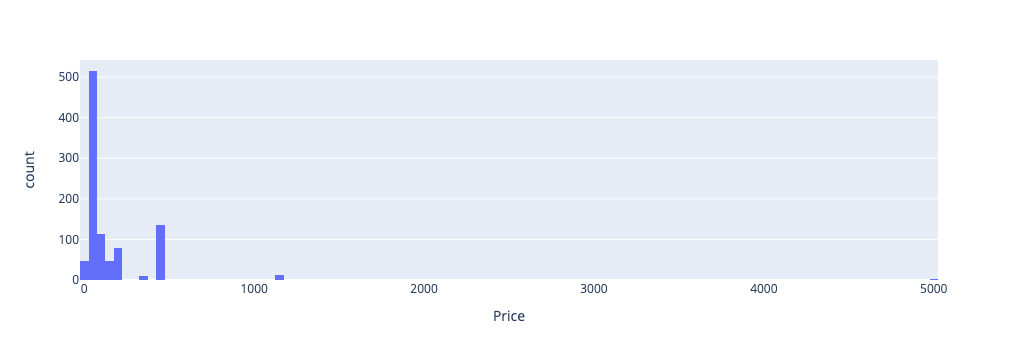

In [66]:
# dist without price = 0
df_price = df_clean[df_clean.Price != 0]
price_wo_hist = px.histogram(df_price, x="Price")
price_wo_hist.show()

In [67]:
df_price.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran, Islamic Republic of
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [68]:
df_clean["Country"] = df_clean.Location.apply(
    lambda x: pd.Series(str(x).split(", ")[-1])
)

In [69]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [70]:
df_clean.Country.value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [107]:
cty_mapping = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran, Islamic Republic of",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Pacific Ocean": "USA",
}

In [108]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [109]:
df_clean.Country = df_clean.Country.apply(
    lambda x: cty_mapping.get(x) if x in cty_mapping else x
)
df_clean.Country.value_counts()

Russian Federation                        1398
USA                                       1387
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: Country, dtype: int64

In [110]:
countries.get("583")

Country(name='Micronesia, Federated States of', alpha2='FM', alpha3='FSM', numeric='583', apolitical_name='Micronesia, Federated States of')

In [111]:
df_clean["CountryCode"] = df_clean.Country.apply(lambda x: countries.get(x).alpha3)
df_cc_qty = df_clean.CountryCode.value_counts()

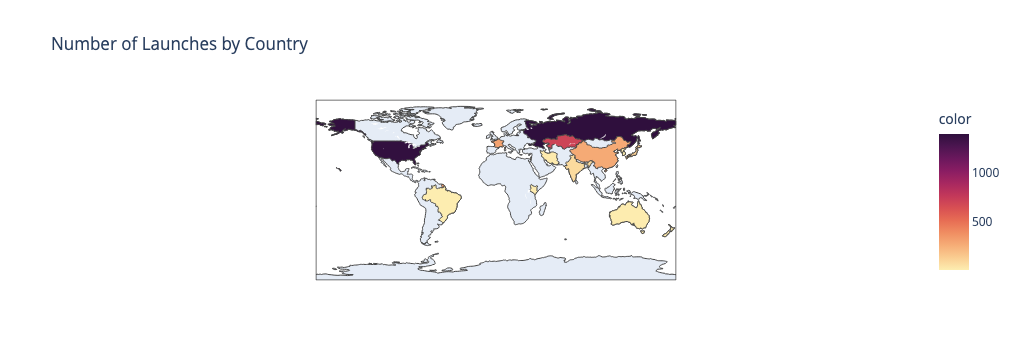

In [117]:
cty_map = px.choropleth(
    locations=df_cc_qty.index,
    color=df_cc_qty.values,
    color_continuous_scale="matter",
    title="Number of Launches by Country",
    labels="Launches",
)
cty_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [122]:
df_failures = df_clean[df_clean.Mission_Status == "Failure"]
df_failures = df_failures.groupby("CountryCode", as_index=False).count()
df_failures.sort_values(by="Location", ascending=False)

,CountryCode,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
13,USA,132,132,132,132,132,132,132,132
8,KAZ,72,72,72,72,72,72,72,72
12,RUS,63,63,63,63,63,63,63,63
2,CHN,19,19,19,19,19,19,19,19
3,FRA,13,13,13,13,13,13,13,13
7,JPN,10,10,10,10,10,10,10,10
4,IND,8,8,8,8,8,8,8,8
5,IRN,8,8,8,8,8,8,8,8
0,AUS,3,3,3,3,3,3,3,3
11,PRK,3,3,3,3,3,3,3,3


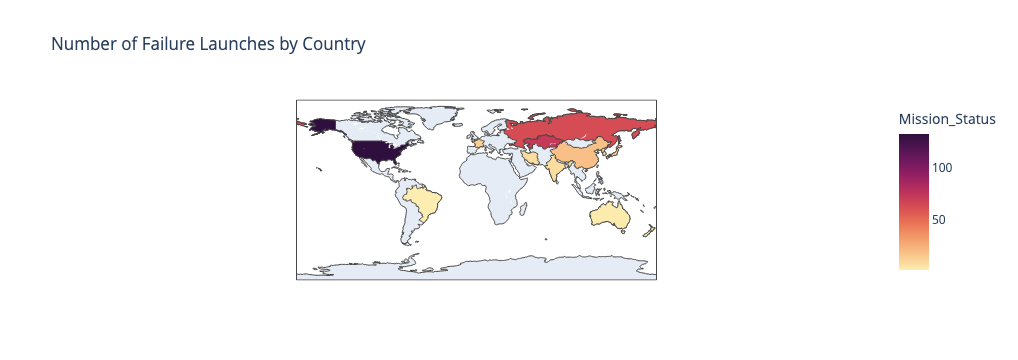

In [123]:
fail_map = px.choropleth(
    data_frame=df_failures,
    locations="CountryCode",
    color="Mission_Status",
    color_continuous_scale="matter",
    title="Number of Failure Launches by Country",
)
fail_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [124]:
df_com = df_clean.groupby(
    by=["CountryCode", "Organisation", "Mission_Status"], as_index=False
).count()
df_com.head()

,CountryCode,Organisation,Mission_Status,Location,Date,Detail,Rocket_Status,Price,Country
0,AUS,AMBA,Success,1,1,1,1,1,1
1,AUS,CECLES,Failure,2,2,2,2,2,2
2,AUS,CECLES,Success,1,1,1,1,1,1
3,AUS,RAE,Failure,1,1,1,1,1,1
4,AUS,RAE,Success,1,1,1,1,1,1


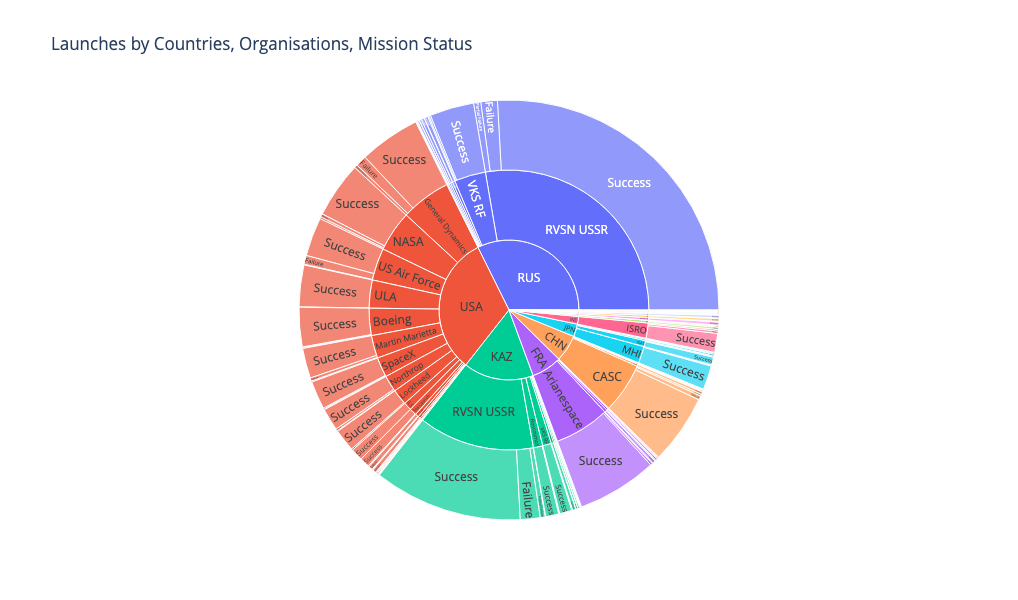

In [129]:
scom_sb = px.sunburst(
    data_frame=df_com,
    path=["CountryCode", "Organisation", "Mission_Status"],
    values="Location",
    title="Launches by Countries, Organisations, Mission Status",
    width=600,
    height=600,
)
scom_sb.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [130]:
df_amount_by_org = (
    df_clean.groupby(by="Organisation", as_index=False)
    .agg({"Price": pd.Series.sum})
    .sort_values(by="Price", ascending=False)
)
df_amount_by_org.head(10)

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


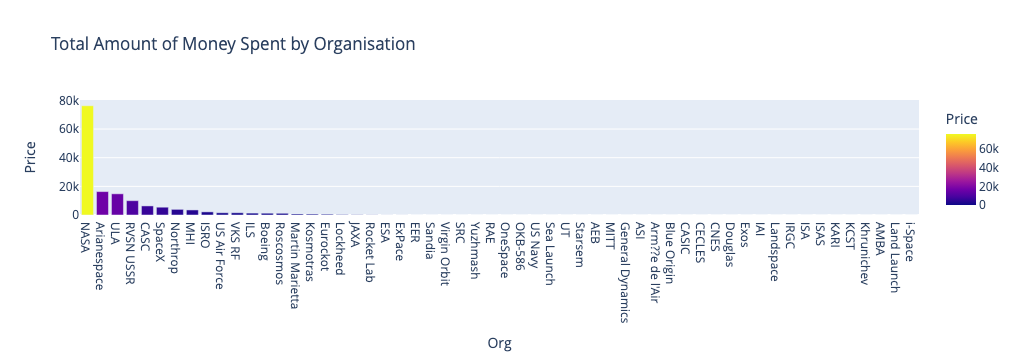

In [134]:
price_bar = px.bar(
    df_amount_by_org,
    x="Organisation",
    y="Price",
    color="Price",
    title="Total Amount of Money Spent by Organisation",
)
price_bar.update_layout(xaxis_title="Org", yaxis_title="Price")
price_bar.show()

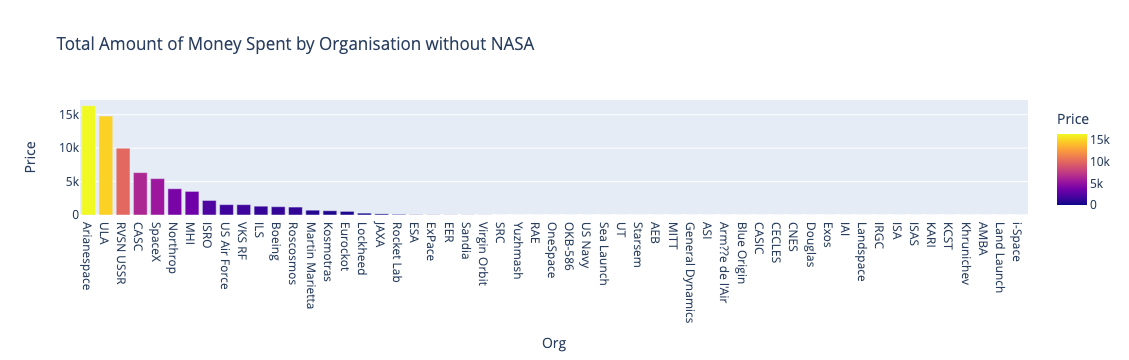

In [136]:
price_bar = px.bar(
    df_amount_by_org[df_amount_by_org.Organisation != "NASA"],
    x="Organisation",
    y="Price",
    color="Price",
    title="Total Amount of Money Spent by Organisation without NASA",
)
price_bar.update_layout(xaxis_title="Org", yaxis_title="Price")
price_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [137]:
df_clean.Date = df_clean.Date.apply(lambda x: str(pd.to_datetime(x)).split()[0])
df_clean.Date = pd.to_datetime(df_clean.Date)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   datetime64[ns]
 3   Detail          4324 non-null   object        
 4   Rocket_Status   4324 non-null   object        
 5   Price           4324 non-null   float64       
 6   Mission_Status  4324 non-null   object        
 7   Country         4324 non-null   object        
 8   CountryCode     4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 304.2+ KB


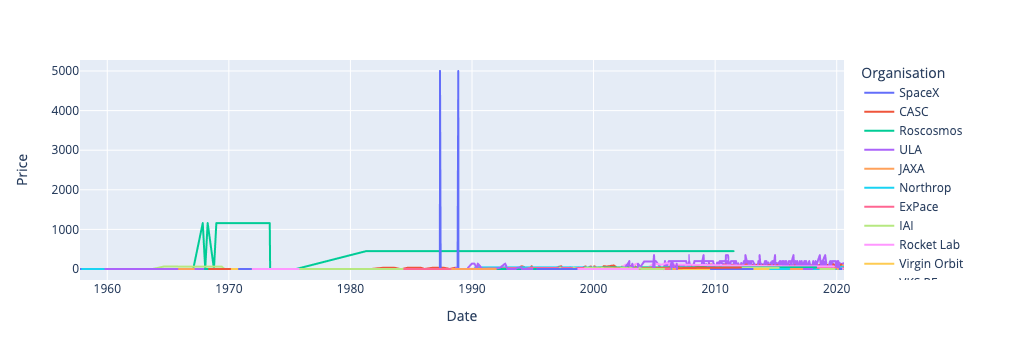

In [138]:
per_launch_line = px.line(df_clean, x="Date", y="Price", color="Organisation")
per_launch_line.show()

# Chart the Number of Launches per Year

In [139]:
df_clean["Year"] = df_clean.Date.dt.year
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,CountryCode,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020


In [140]:
df_year = df_clean.Year.value_counts().sort_index()
df_year.head()

1957     3
1958    28
1959    20
1960    39
1961    52
Name: Year, dtype: int64

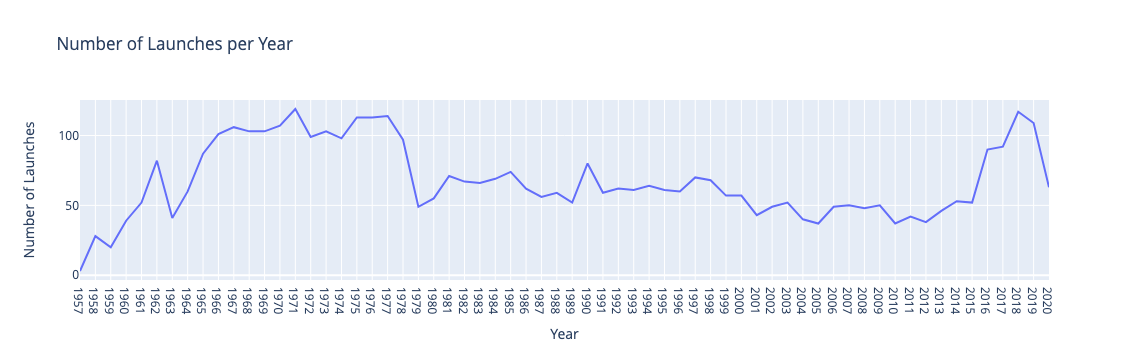

In [151]:
year_line = px.line(
    x=df_year.index, y=df_year.values, title="Number of Launches per Year"
)
year_line.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches",
    xaxis=dict(
        tickformat="%Y",
        dtick="Y1",  # Set the desired tick frequency, e.g., 'M1' for monthly ticks
    ),
)
year_line.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [142]:
df_clean["Month"] = df_clean.Date.dt.month
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,CountryCode,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7


In [143]:
df_month = df_clean.Month.value_counts().sort_index()
df_month.head()

1    268
2    336
3    353
4    383
5    326
Name: Month, dtype: int64

In [144]:
df_month_rolling = df_month.rolling(window=3).mean()
df_month_rolling.head()

1      NaN
2      NaN
3   319.00
4   357.33
5   354.00
Name: Month, dtype: float64

In [145]:
df_impose = pd.concat([df_month, df_month_rolling], keys=["month", "month_rollinng"])
df_impose = df_impose.reset_index()
df_impose.columns = ["level", "month", "count"]
df_impose

,level,month,count
0,month,1,268.00
1,month,2,336.00
2,month,3,353.00
3,month,4,383.00
4,month,5,326.00
5,month,6,402.00
6,month,7,351.00
7,month,8,373.00
8,month,9,365.00
9,month,10,381.00


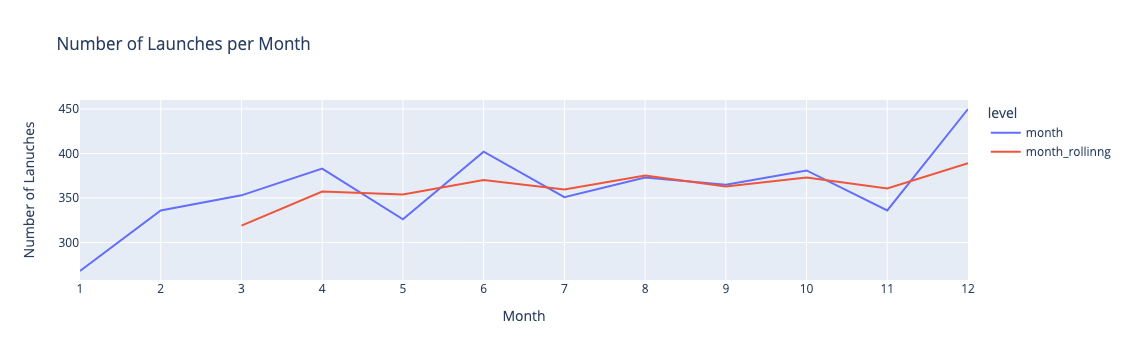

In [153]:
month_line = px.line(
    data_frame=df_impose,
    x="month",
    y="count",
    color="level",
    title="Number of Launches per Month",
)
month_line.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Lanuches",
    xaxis=dict(tickformat="%Y-%M", dtick="M1"),
)
month_line.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [168]:
df_month.index.astype(str)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

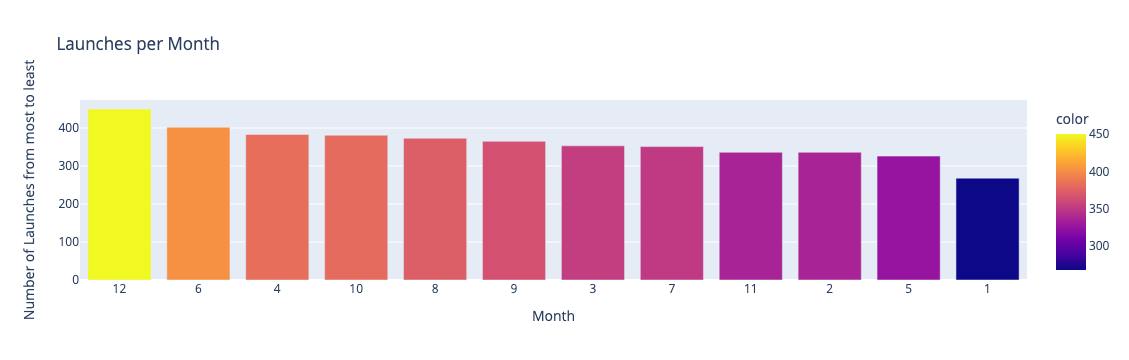

In [171]:
month_sort_bar = px.bar(
    x=df_month.index.astype(str),  # x from int to str for categoryorder
    y=df_month.values,
    color=df_month.values,
    title="Launches per Month",
)
month_sort_bar.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Launches from most to least",
    xaxis={"categoryorder": "total descending"},
)
month_sort_bar.show()

In [172]:
df_year.sort_values(ascending=False).head()

1971    119
2018    117
1977    114
1976    113
1975    113
Name: Year, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [188]:
df_avg_price = df_clean.groupby(["Year"], as_index=False).agg({"Price": pd.Series.mean})
df_avg_price.shape

(64, 2)

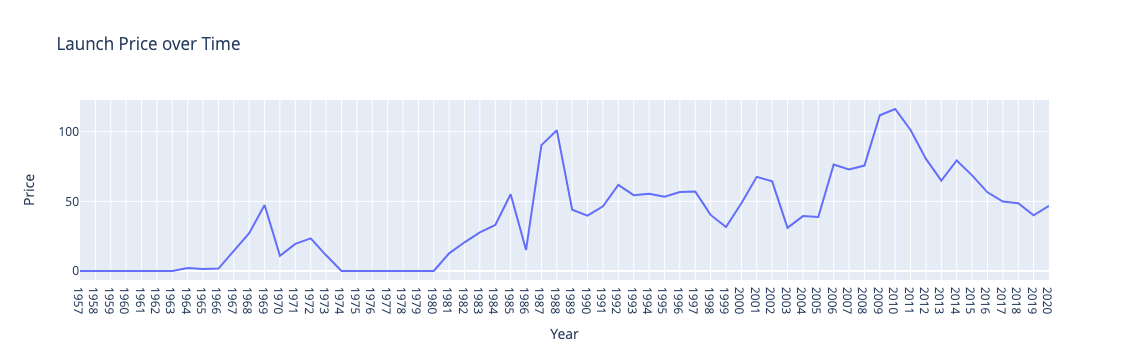

In [193]:
lp_line = px.line(
    data_frame=df_avg_price,
    x="Year",
    y="Price",
    title="Launch Price over Time",
)
lp_line.update_layout(
    xaxis_title="Year",
    yaxis_title="Price",
    xaxis=dict(dtick="Y1"),
)
lp_line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [194]:
top10 = df_clean.Organisation.value_counts().sort_values(ascending=False).head(10)
top10

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

In [197]:
df_org = df_clean[df_clean.Organisation.isin(top10.index.to_list())]
df_org = df_org.groupby(["Organisation", "Year"], as_index=False).agg(
    {"Detail": pd.Series.count}
)
df_org.head()

,Organisation,Year,Detail
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3
3,Arianespace,1987,2
4,Arianespace,1988,6


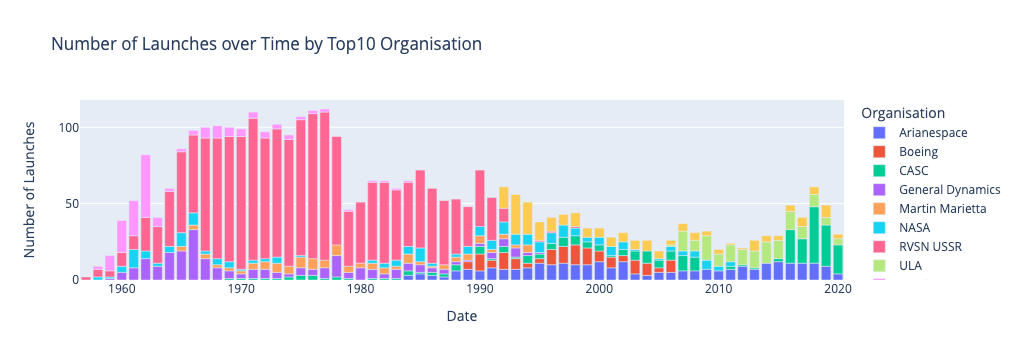

In [201]:
lauch_org_bar = px.bar(
    data_frame=df_org,
    x="Year",
    y="Detail",
    color="Organisation",
    title="Number of Launches over Time by Top10 Organisation",
)
lauch_org_bar.update_layout(xaxis_title="Date", yaxis_title="Number of Launches")
lauch_org_bar.show()

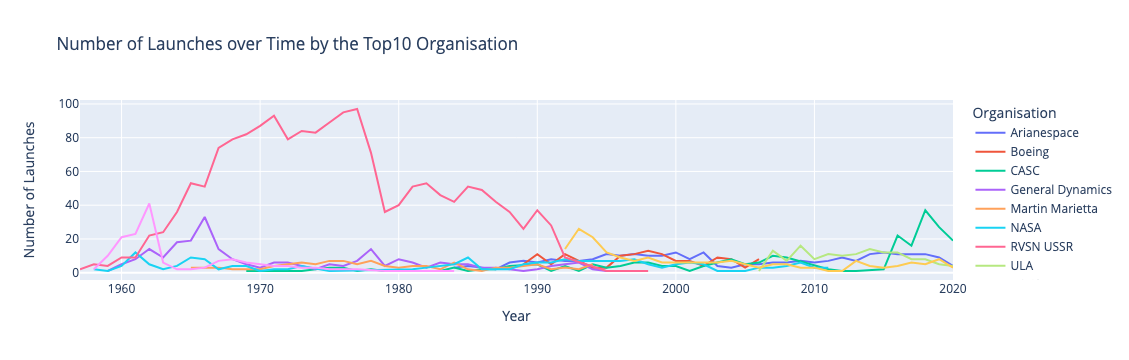

In [202]:
org_year_line = px.line(
    data_frame=df_org,
    x="Year",
    y="Detail",
    color="Organisation",
    title="Number of Launches over Time by the Top10 Organisation",
)
org_year_line.update_layout(xaxis_title="Year", yaxis_title="Number of Launches")
org_year_line.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [203]:
df_cold_war = df_clean[
    (df_clean.Year <= 1991)
    & (df_clean.Country.isin(["USA", "Russian Federation", "Kazakhstan"]))
]
df_cold_war.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,CountryCode,Year,Month
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20,Rokot/Briz K | GVM Demo Flight,StatusRetired,0.00,Success,Kazakhstan,KAZ,1991,12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,0.00,Success,Russian Federation,RUS,1991,12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07,Atlas II | Eutelsat 2F3,StatusRetired,0.00,Success,USA,USA,1991,12
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,0.00,Success,USA,USA,1991,11
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,0.00,Success,Russian Federation,RUS,1991,11


In [207]:
df_cold_war.Country.value_counts()

Russian Federation    1188
USA                    662
Kazakhstan             582
Name: Country, dtype: int64

In [208]:
df_cold_war.Organisation.value_counts()

RVSN USSR           1765
General Dynamics     237
US Air Force         161
NASA                 111
Martin Marietta      104
Boeing                21
US Navy               17
AMBA                   7
Yuzhmash               2
Northrop               2
OKB-586                2
Lockheed               1
Douglas                1
Roscosmos              1
Name: Organisation, dtype: int64

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [212]:
df_cold_war["Power"] = df_cold_war.Country.apply(
    lambda x: "USA" if x == "USA" else "USSR"
)
df_cold_war.head()

/var/folders/_j/jq06f7cn7sn43jjn678gnchc0000gn/T/ipykernel_9960/2362957810.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,CountryCode,Year,Month,Power
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20,Rokot/Briz K | GVM Demo Flight,StatusRetired,0.00,Success,Kazakhstan,KAZ,1991,12,USSR
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,0.00,Success,Russian Federation,RUS,1991,12,USSR
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07,Atlas II | Eutelsat 2F3,StatusRetired,0.00,Success,USA,USA,1991,12,USA
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,0.00,Success,USA,USA,1991,11,USA
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,0.00,Success,Russian Federation,RUS,1991,11,USSR


In [217]:
df_2power = df_cold_war.Power.value_counts()

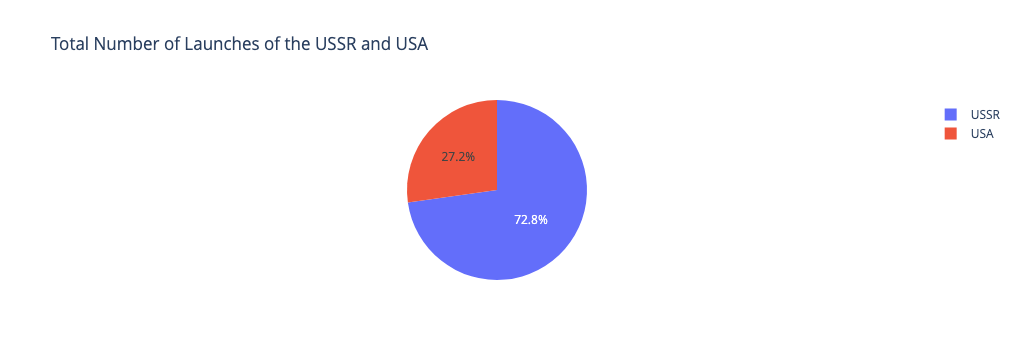

In [218]:
power_pie = px.pie(
    names=df_2power.index,
    values=df_2power.values,
    title="Total Number of Launches of the USSR and USA",
)
power_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [220]:
df_year_2power = df_cold_war.groupby(["Power", "Year"], as_index=False).agg(
    {"Detail": pd.Series.count}
)
df_year_2power.tail()

,Power,Year,Detail
65,USSR,1987,42
66,USSR,1988,36
67,USSR,1989,26
68,USSR,1990,37
69,USSR,1991,29


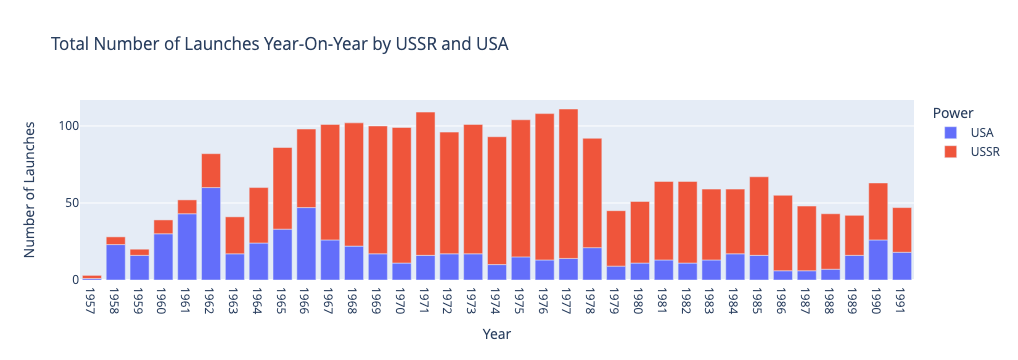

In [221]:
year_2power_bar = px.bar(
    data_frame=df_year_2power,
    x="Year",
    y="Detail",
    color="Power",
    title="Total Number of Launches Year-On-Year by USSR and USA",
)
year_2power_bar.update_layout(
    xaxis_title="Year", yaxis_title="Number of Launches", xaxis=dict(dtick="Y1")
)
year_2power_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [230]:
df_year_f = df_clean[df_clean.Mission_Status.str.contains("Failure")]
df_year_f = df_year_f.groupby(["Year", "Mission_Status"], as_index=False).agg(
    {"Detail": pd.Series.count}
)
df_year_f

,Year,Mission_Status,Detail
0,1957,Failure,1
1,1958,Failure,20
2,1958,Partial Failure,2
3,1959,Failure,9
4,1959,Partial Failure,3
...,...,...,...
109,2018,Partial Failure,2
110,2019,Failure,6
111,2019,Partial Failure,2
112,2019,Prelaunch Failure,1


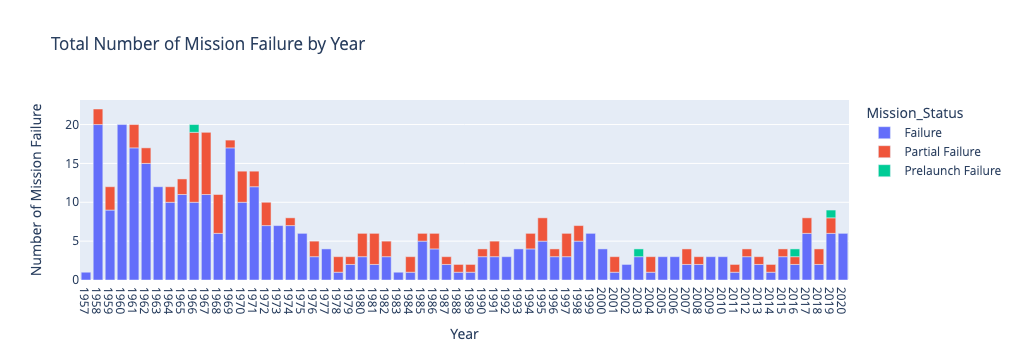

In [232]:
year_fail_bar = px.bar(
    data_frame=df_year_f,
    x="Year",
    y="Detail",
    color="Mission_Status",
    title="Total Number of Mission Failure by Year",
)
year_fail_bar.update_layout(
    xaxis_title="Year", yaxis_title="Number of Mission Failure", xaxis=dict(dtick="Y1")
)
year_fail_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [246]:
df_pct = df_clean.groupby(["Year", "Mission_Status"], as_index=False).agg(
    {"Detail": pd.Series.count}
)
df_pct = df_pct.pivot(index="Year", columns="Mission_Status", values="Detail").fillna(0)

In [248]:
df_pct.reset_index(inplace=True)
df_pct.head()

Mission_Status,Year,Failure,Partial Failure,Prelaunch Failure,Success
0,1957,1.00,0.00,0.00,2.00
1,1958,20.00,2.00,0.00,6.00
2,1959,9.00,3.00,0.00,8.00
3,1960,20.00,0.00,0.00,19.00
4,1961,17.00,3.00,0.00,32.00


In [256]:
df_pct["Failure_PCT"] = df_pct.iloc[:, 1:-2].sum(axis=1) / df_pct.iloc[:, 1:].sum(
    axis=1
)
df_pct.head()

Mission_Status,Year,Failure,Partial Failure,Prelaunch Failure,Success,Failure_PCT
0,1957,1.00,0.00,0.00,2.00,0.33
1,1958,20.00,2.00,0.00,6.00,0.79
2,1959,9.00,3.00,0.00,8.00,0.60
3,1960,20.00,0.00,0.00,19.00,0.51
4,1961,17.00,3.00,0.00,32.00,0.38


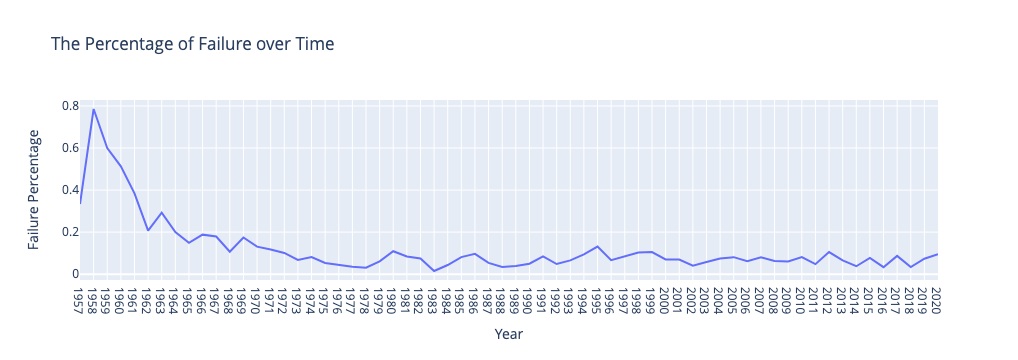

In [259]:
pct_line = px.line(
    data_frame=df_pct,
    x="Year",
    y="Failure_PCT",
    title="The Percentage of Failure over Time",
)
pct_line.update_layout(
    xaxis_title="Year", yaxis_title="Failure Percentage", xaxis=dict(dtick="Y3")
)
pct_line.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [260]:
df_year_cty = df_clean.groupby(["Year", "Country"], as_index=False).agg(
    {"Detail": pd.Series.count}
)
df_year_cty.head()

,Year,Country,Detail
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4


USA was dominant from 1957 to 1966, while Russian Federation showed leading role from 1977 to 1990.

After that, USA was predominant until 2018. From 2018 to 2020, both China and USA were on the top level.

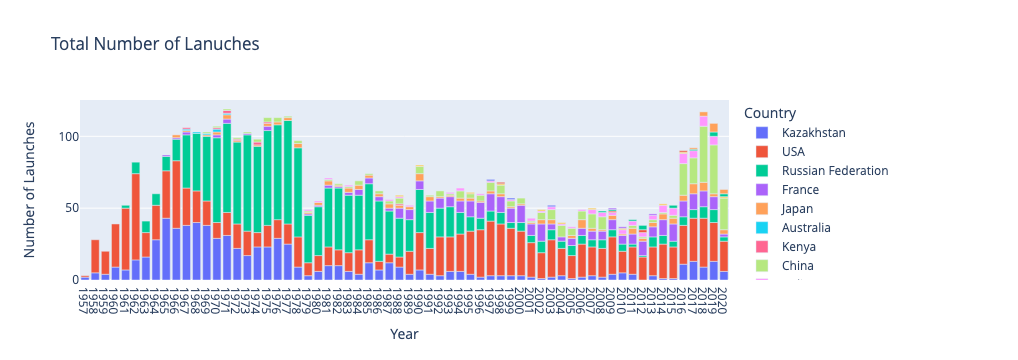

In [268]:
year_cty_bar = px.bar(
    data_frame=df_year_cty,
    x="Year",
    y="Detail",
    color="Country",
    title="Total Number of Lanuches",
)
year_cty_bar.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches",
    xaxis=dict(dtick="Y3"),
)
year_cty_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [269]:
df_year_org = df_clean.groupby(["Year", "Organisation"], as_index=False).agg(
    {"Detail": pd.Series.count}
)
df_year_org.head()

,Year,Organisation,Detail
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5


RVSN USSR was dominant in the 1970s and 1980s, while CASA was dominant in 2018, 2019 and 2020.

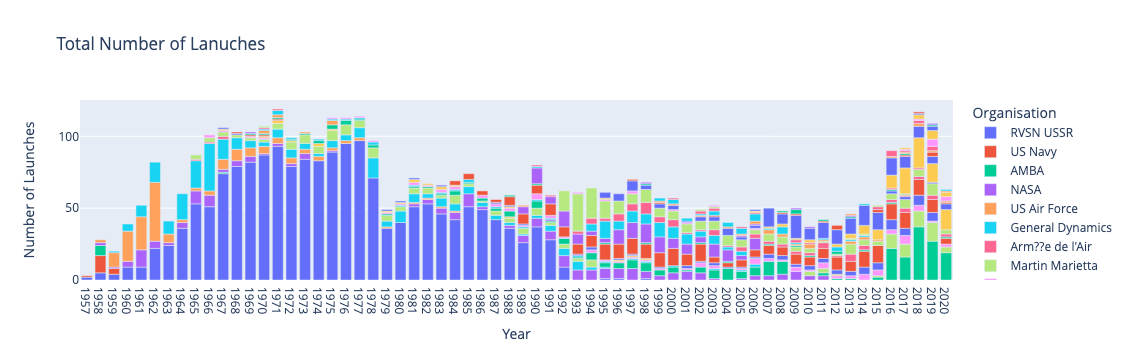

In [270]:
year_org_bar = px.bar(
    data_frame=df_year_org,
    x="Year",
    y="Detail",
    color="Organisation",
    title="Total Number of Lanuches",
)
year_org_bar.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches",
    xaxis=dict(dtick="Y3"),
)
year_org_bar.show()